# <font color='Black'> Проект: Статистический анализ данных. 

Вы аналитик популярного сервиса аренды самокатов GoFast. Получены данные о некоторых пользователях из нескольких городов, а также об их поездках.  

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 

Сервисом можно пользоваться:

без подписки (абонентская плата отсутствует);
стоимость одной минуты поездки — 
8 рублей;
стоимость старта (начала поездки) — 
50 рублей;

с подпиской Ultra
абонентская плата — 
199 рублей в месяц;
стоимость одной минуты поездки — 
6 рублей;
стоимость старта — бесплатно.

В проекте необходимо загрузить данные, провести их предобработку и исследовательский анализ данных. Также понадобиться посчитать выручку компании и протестировать некоторые гипотезы, которые помогут принять бизнесу правильные решения.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np         
from scipy import stats as st #импортируем все необходимые библиотеки

#### Шаг 1. Загрузка данных

1.1 Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы.

In [2]:
df1 = pd.read_csv('/datasets/users_go.csv')            #считываем данные и сохраняем их в переменные
df2 = pd.read_csv('/datasets/rides_go.csv')
df3 = pd.read_csv('/datasets/subscriptions_go.csv')

1.2 Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

In [3]:
df1.head() #вывод первых пяти строк датафрейма

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
df2.head() #вывод первых пяти строк датафрейма

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
df3.head() #вывод первых пяти строк датафрейма

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [6]:
df1.info() #получаем общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [7]:
df2.info() #получаем общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
df3.info() #получаем общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Вывод:** познакомились с данными. Всего 3 датафрейма. Первый имеет 5 столбцов и 1564 строк, второй 4 столбца и 18067 строк, третий 4 столбца и 2 строки.

#### Шаг 2. Предобработка данных

2.1 Приведите столбец date к типу даты pandas.

In [9]:
df2['date'] = pd.to_datetime(df2['date'], format='%Y.%m.%d') #приведение столбца data к типу даты pandas

In [10]:
df2['date'].unique() #проверка за какой период данные. Год один и тот же во всем датафрейме

array(['2021-01-01T00:00:00.000000000', '2021-01-18T00:00:00.000000000',
       '2021-04-20T00:00:00.000000000', '2021-08-11T00:00:00.000000000',
       '2021-08-28T00:00:00.000000000', '2021-10-09T00:00:00.000000000',
       '2021-10-19T00:00:00.000000000', '2021-11-06T00:00:00.000000000',
       '2021-11-14T00:00:00.000000000', '2021-11-22T00:00:00.000000000',
       '2021-12-14T00:00:00.000000000', '2021-12-22T00:00:00.000000000',
       '2021-03-15T00:00:00.000000000', '2021-03-18T00:00:00.000000000',
       '2021-03-23T00:00:00.000000000', '2021-04-08T00:00:00.000000000',
       '2021-04-13T00:00:00.000000000', '2021-06-20T00:00:00.000000000',
       '2021-07-02T00:00:00.000000000', '2021-07-18T00:00:00.000000000',
       '2021-08-03T00:00:00.000000000', '2021-10-27T00:00:00.000000000',
       '2021-12-18T00:00:00.000000000', '2021-01-31T00:00:00.000000000',
       '2021-02-24T00:00:00.000000000', '2021-02-26T00:00:00.000000000',
       '2021-04-12T00:00:00.000000000', '2021-05-07

2.2 Создайте новый столбец с номером месяца на основе столбца date.

In [12]:
df2['month'] = df2['date'].dt.month #создание нового столбца в датафрейме df2 с номером месяца

2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

In [13]:
df2.head() #просмотр результата преобразований

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [14]:
df1.isna().sum() #подсчет пропущенных значений для датафрейма df1

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [15]:
df2.isna().sum() #подсчет пропущенных значений для датафрейма df2

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [16]:
df3.isna().sum() #подсчет пропущенных значений для датафрейма df3

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [17]:
df1.duplicated().sum() #подсчет дубликатов в df1

31

In [18]:
df2.duplicated().sum() #подсчет дубликатов в df2

0

In [19]:
df3.duplicated().sum() #подсчет дубликатов в df3

0

In [20]:
df1 = df1.drop_duplicates() #удаление дубликатов в датафрейме df1

**Вывод:** привели столбец date к типу даты в pandas, а также создали на его основе новый столбец с номером месяца. Подсчитали везде пропущенные значения (их нет) и провели поиск явных дубликатов. Удалили все явные дубликаты в в датафрейме 1.

In [21]:
# Комментарий ревьюера
temp = df2.copy() # Создаем копию, что бы не изменять текущий датасет
display(temp['distance'].head(3))
# Округление расстояния
temp['distance'] = temp['distance'].round(2)
temp['distance'].head(3)

0    4409.919140
1    2617.592153
2     754.159807
Name: distance, dtype: float64

0    4409.92
1    2617.59
2     754.16
Name: distance, dtype: float64

In [22]:
df2['distance'] = df2['distance'].round(2) #округление расстояния до двух знаков после точки.

In [23]:
df2['duration'].describe() #проверка колонки с длительностью поездок на аномалии

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

#### Шаг 3. Исследовательский анализ данных

Опишите и визуализируйте общую информацию о пользователях и поездках:

3.1 частота встречаемости городов;

In [24]:
frequency_cities = df1.pivot_table(index='city', values='user_id', aggfunc='count') #создание сводной таблицы для частоты встречаемости городов

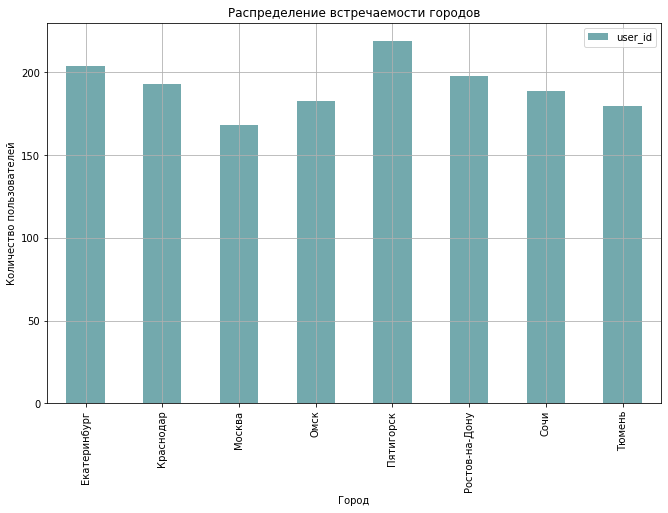

In [25]:
frequency_cities.plot(kind='bar', figsize=(11, 7), color='#73A9AD', grid=True) #построение графика для частоты встречаемости городов
plt.title('Распределение встречаемости городов')
plt.xlabel('Город') 
plt.ylabel('Количество пользователей')
plt.show()

In [26]:
frequency_cities #вывод числовых значений количества пользователей по городам.

,user_id
city,
Екатеринбург,204
Краснодар,193
Москва,168
Омск,183
Пятигорск,219
Ростов-на-Дону,198
Сочи,189
Тюмень,180


<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Можно вывести значения количества пользователей в городах прямо на диаграмме, примерно вот так:</font>

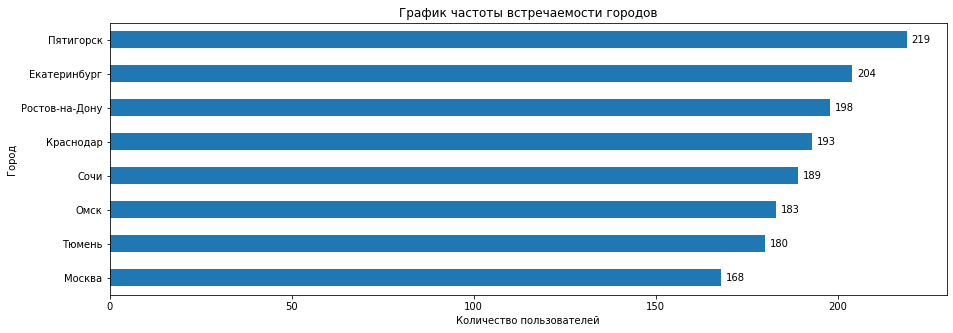

In [27]:
# Комментарий ревьюера 2
import matplotlib.pyplot as plt
import pandas as pd

# Создаем копию датасета, что бы не работать с исходным
tmp = df1.copy()

# Построение горизонтальной диаграммы
ax = tmp['city'].value_counts(ascending=True).plot(
    kind='barh',
    figsize=(15, 5),
    title='График частоты встречаемости городов'
)

# Добавление значений рядом со столбцами
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

# Добавление меток осей
plt.xlabel('Количество пользователей')
plt.ylabel('Город')

# Отображение графика
plt.show()

**Вывод:** из графика и числовых значений видно, что услугами аренды самокатов чаще всего пользуются в городе Пятигорск, а меньше всего - в Москве. Тем не менее различия в частоте встречаемости городов не большие. 

3.2 соотношение пользователей с подпиской и без подписки;

In [28]:
ratio_subscription = df1.pivot_table(index='subscription_type', values='user_id', aggfunc='count')

In [29]:
ratio_subscription['ratio'] = ratio_subscription['user_id'] / 1534 #вычисление долей пользователей с подпиской и без.

In [30]:
ratio_subscription #вывод таблицы с долей пользователей и без.

,user_id,ratio
subscription_type,,
free,835,0.544329
ultra,699,0.455671


**Вывод:** из таблицы видно, что число пользователей без подписки больше, чем с подпиской, но не намного. Соотношение составляет примерно 54 на 46.

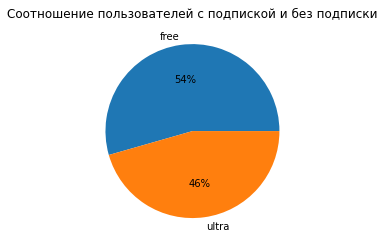

In [31]:
# Комментарий ревьюера 2
import matplotlib.pyplot as plt
temp = df1.copy()
temp['subscription_type'].value_counts().plot(
    kind= 'pie',
    title= 'Соотношение пользователей с подпиской и без подписки',
    autopct = "%.0f%%",
    ylabel= ""
)
plt.show()

3.3 возраст пользователей (описать и визуализировать);

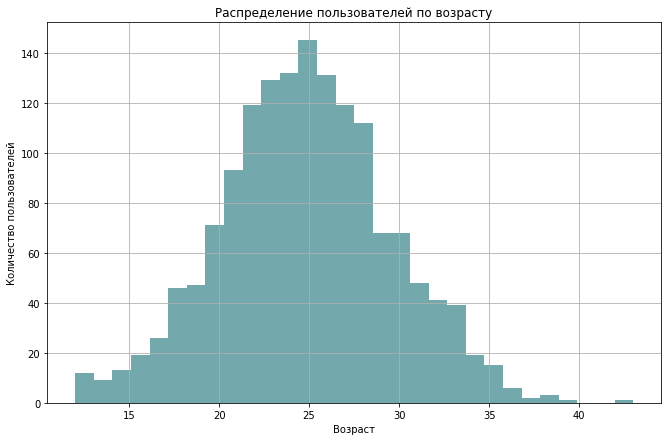

In [32]:
df1['age'].hist(bins=30, figsize=(11, 7), color='#73A9AD')  #построение графика для распределения пользователей по возрасту
plt.title('Распределение пользователей по возрасту')
plt.xlabel('Возраст') 
plt.ylabel('Количество пользователей')
plt.show()

In [33]:
df1['age'].describe() #вывод сводной статистики информации о возрасте пользователей

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

**Вывод:** на графике и на описательной статистике мы видим, что самокатами чаще всего пользуются люди в возрасте 25 лет. Тем не менее мы также наблюдаем, что люди до 18 лет также пользуются услугами самокатов, что является нарушением действующих правил аренды. Минимальный зафиксированный возраст - 12 лет. 

3.4 расстояние, которое пользователь преодолел за одну поездку (описать и визуализировать);

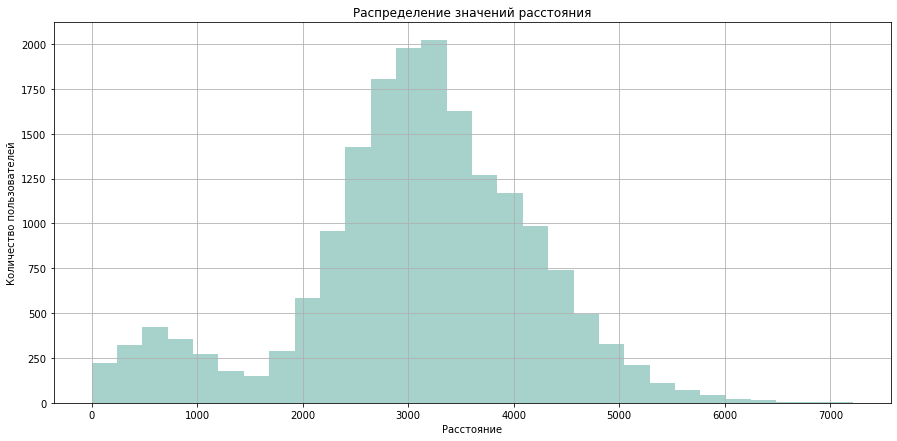

In [34]:
#построение графика для распределения расстояния 
df2['distance'].hist(bins = 30, figsize = (15, 7), color='#A7D2CB')
plt.title('Распределение значений расстояния')
plt.xlabel('Расстояние') 
plt.ylabel('Количество пользователей')
plt.show()

In [35]:
df2['distance'].describe() #сводная статистика расстояний

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

**Вывод** из графика видно, что пользователи проезжают расстояние от 0 до 7000 метров за одну поездку. Максимальное значение 7211, минимальное - меньше метра. Половина пользователей проезжает расстояние равное 3134 метра.

3.5 продолжительность поездок (опишите и визуализируйте).

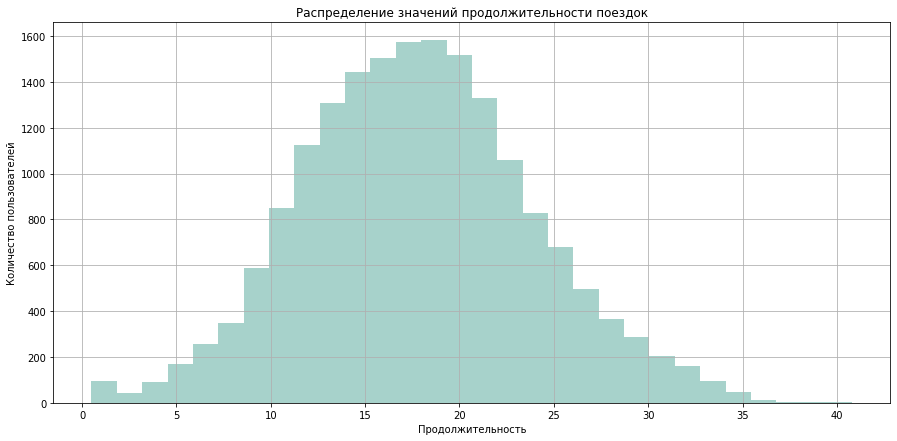

In [36]:
df2['duration'].hist(bins = 30, figsize = (15, 7), color='#A7D2CB')  #построение графика для распределения продолжительности поездки для каждого пользователя
plt.title('Распределение значений продолжительности поездок')
plt.xlabel('Продолжительность') 
plt.ylabel('Количество пользователей')
plt.show()

In [37]:
df2['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

**Вывод:** минимальное количество продолжительности поездки составило менее минуты, максимальное - 40 минут. Половина пользователей проезжают на самокатах более 18 минут, другая половина - менее 18 минут.

**Вывод по разделу:** успешно визуализировали общую информацию о пользователях и поездках. В целом, видно, что распределение по городам примерно равномерное, чаще пользуются бесплатной версией, есть нарушители пользователей аренды самокатов (минимальный зафиксированный возраст - 12 лет), визуализировали инфоррмацию о пройденном расстоянии и продолжительности поездки для каждого отдельного пользователя.  

#### Шаг 4. Объединение данных

4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

In [38]:
merged_df = pd.merge(df1, df2, on='user_id', how='inner') #Объединенине данных о пользователях, поездках и подписках в один датафрейм.

In [39]:
merged_df.info() #проверка размерности датасета

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.4+ MB


In [40]:
merged_df.isna().sum() #проверка пропусков

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
dtype: int64

In [41]:
merged_df.head() #вывод пяти строк для проверки

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.92,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.59,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.16,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.78,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.69,26.265803,2021-08-28,8


4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:

c данными о пользователях без подписки;

с данными о пользователях с подпиской.

In [42]:
subfree_df = merged_df.query('subscription_type == "free"') #данные о пользователях без подписки

In [43]:
sub_df = merged_df.query('subscription_type == "ultra"') #данные о пользователях с подпиской

In [44]:
sub_df.head() #вывод датасета для проверки

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.92,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.59,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.16,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.78,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.69,26.265803,2021-08-28,8


In [45]:
subfree_df.head() #вывод датасета для проверки

,user_id,name,age,city,subscription_type,distance,duration,date,month
6500,700,Айдар,22,Омск,free,2515.69,14.944286,2021-01-02,1
6501,700,Айдар,22,Омск,free,846.93,16.234663,2021-02-01,2
6502,700,Айдар,22,Омск,free,4004.43,20.016628,2021-02-04,2
6503,700,Айдар,22,Омск,free,1205.91,9.782872,2021-02-10,2
6504,700,Айдар,22,Омск,free,3047.38,17.427673,2021-02-14,2


4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

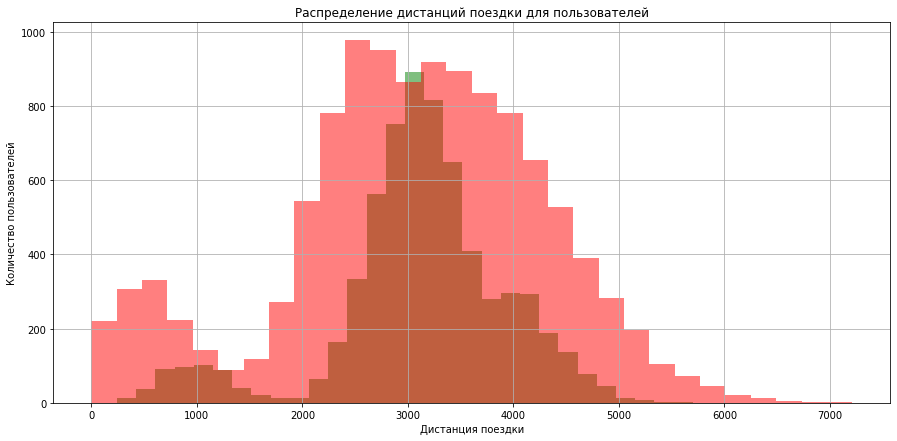

In [46]:
sub_df['distance'].hist(bins = 30, figsize = (15, 7), color='green', alpha=0.5) #диаграммы со расстоянием с подпиской и без и ее визуализация
subfree_df['distance'].hist(bins = 30, figsize = (15, 7), color='red', alpha=0.5)
plt.title('Распределение дистанций поездки для пользователей')
plt.xlabel('Дистанция поездки') 
plt.ylabel('Количество пользователей')
plt.show()

**Вывод:** из графика видно, что в целом подписка не особо влияет на дистанцию поездки. 

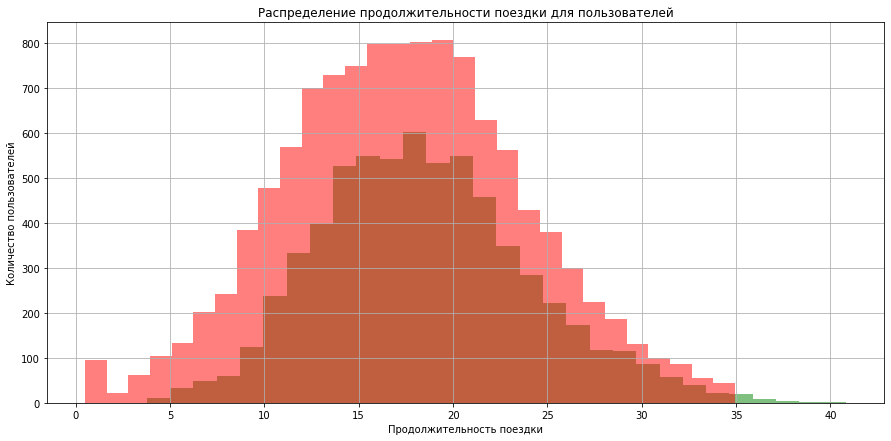

In [47]:
sub_df['duration'].hist(bins = 30, figsize = (15, 7), color='green', alpha=0.5) #диаграммы с продолжительностью поездки с подпиской и без и ее визуализация
subfree_df['duration'].hist(bins = 30, figsize = (15, 7), color='red', alpha=0.5)
plt.title('Распределение продолжительности поездки для пользователей')
plt.xlabel('Продолжительность поездки') 
plt.ylabel('Количество пользователей')
plt.show()

**Вывод:** из графика видно, что в целом подписка не оказывает никакого влияния на продолжительности поездок для каждого отельного пользователя. 

**Вывод:** успешно объединили данные о пользователях, поездках и подписок в один датафрейм. Сделали срез данных по типу наличия или отсутсвия подписки. Визуализировали данные отображающие продолжительность поездок, расстояний для пользователей с подпиской и без нее. В целом наличие подписки не оказывает влияния ни на продолжительность поездки, ни на расстояние.  

#### Шаг 5. Подсчёт выручки

5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: 

найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [48]:
merged_df['duration'] = np.ceil(merged_df['duration']) #округление продолжительности каждой поездки

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Правильное решение.</font>

In [49]:
aggregated_df = merged_df.pivot_table(index=['user_id', 'month'], values=['distance', 'duration'], aggfunc='sum') #создаем агреггированный список суммарного расстояния и времени для каждого пользователя каждый месяц

In [50]:
trips = merged_df.pivot_table(index=['user_id', 'month'], values='name', aggfunc='count') #найдем количество поездок за месяц для каждого пользователя

In [51]:
new_df = aggregated_df.merge(trips, on=['user_id', 'month'], how='inner') #агреггированная таблица с суммарным расстоянием, количеством поездок и суммарным временем для каждого месяца

In [52]:
new_df.columns = ['sum_distance', 'sum_longevity', 'number_trips'] #меняем название колонок

In [53]:
new_df.head()

sum_distance  sum_longevity  number_trips
user_id month                                           
1       1           7027.51           42.0             2
        4            754.16            7.0             1
        8           6723.47           46.0             2
        10          5809.91           32.0             2
        11          7003.50           56.0             3

In [54]:
new_df.isna().sum() #проверка на пропуски

sum_distance     0
sum_longevity    0
number_trips     0
dtype: int64

Известно, что подписку ультра имеют пользователи до номера user_id 699 включительно, а бесплатную - все остальные.

Формула для платной подписки: 0 х количество поездок + 6 х общая продолжительность всех поездок в минутах + 199

Формула для бесплатной подписки: 50 х количество поездок + 8 х общая продолжительность всех поездок в минутах + 0

In [55]:
calc_revenue_ultra = 0 * new_df.query('user_id <= 699')['number_trips'] + 6 * new_df.query('user_id <= 699')['sum_longevity'] + 199 #расчет для подписки ультра

In [56]:
calc_revenue_free = 50 * new_df.query('user_id > 699')['number_trips'] + 8 * new_df.query('user_id > 699')['sum_longevity'] + 0 #расчет для бесплатной подписки

In [57]:
calc_revenue = pd.concat([calc_revenue_ultra, calc_revenue_free], axis=0)

In [58]:
calc_revenue = calc_revenue.reset_index(drop=True) #сбрасываем индексы

In [59]:
new_df = new_df.reset_index() #делаем из индексов столбцы

In [60]:
new_df['revenue'] = calc_revenue #новая таблица с добавленным столбцом по помесячной выручке добавлен

In [61]:
new_df.head() #просмотр полученной таблицы

,user_id,month,sum_distance,sum_longevity,number_trips,revenue
0,1,1,7027.51,42.0,2,451.0
1,1,4,754.16,7.0,1,241.0
2,1,8,6723.47,46.0,2,475.0
3,1,10,5809.91,32.0,2,391.0
4,1,11,7003.50,56.0,3,535.0


In [62]:
# Комментарий ревьюера
# Контроль суммы выручки
tmp, col_rev = new_df.copy(), 'revenue'
print("Правильное значение суммы выручки 3878641, сумма выручки расчитанная в таблице:", tmp[col_rev].sum())

Правильное значение суммы выручки 3878641, сумма выручки расчитанная в таблице: 3878641.0


**Вывод:** провели подсчет выручки для каждого пользователя помесячно и записали данные в таблицу.

#### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

In [63]:
new_df_sub = new_df.query('user_id <= 699')     #делим новую таблицу на два среза
new_df_subfree = new_df.query('user_id > 699')

воспользуемся ранее полученной таблицей для гипотезы: "тратят ли пользователи с подпиской больше времени на поездки?"

Известно, что подписку ультра имеют пользователи до номера user_id 699 включительно, а бесплатную - все остальные.

Нулевая гипотеза: пользователи с подпиской одинаково тратят время на поездки по сравнению с пользователями без подписки. 

Альтернативная - пользователи с подпиской тратят больше времени на поездки.

In [64]:
print('среднее первой выборки - с подпиской:', np.mean(sub_df['duration']))
print('среднее первой выборки - без подписки:', np.mean(subfree_df['duration']))
alpha = 0.05
results = st.ttest_ind(sub_df['duration'], subfree_df['duration'], alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

среднее первой выборки - с подпиской: 18.54198516280583
среднее первой выборки - без подписки: 17.39090929866399
p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Вывод:** пользователи с подпиской статистически значимо больше тратят времени на поездки.

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. 
Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку составляет 3130 метров. 

Альтернативная гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку более 3130 метров.

In [65]:
value = 3130
alpha = 0.05
print(np.mean(sub_df['distance']))
results = st.ttest_1samp(sub_df['distance'], value, alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

3115.445430769231
p-значение: 0.9195362605842414
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Действительно, статистически можно сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку составляет 3130 метров, что является оптимальным с точки зрения износа самоката.  

6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 
Сделайте вывод.

Нулевая гипотеза: помесячная выручка от пользователей с подпиской по месяцам такая же, как и выручка по месяцам от пользователей без подписки. Альтернативная: помесячная выручка от пользователей с подпиской по месяцам больше, чем выручка по месяцам от пользователей без подписки. 

In [66]:
print('среднее первой выборки - с подпиской:', np.mean(new_df_sub['revenue']))
print('среднее первой выборки - без подписки:', np.mean(new_df_subfree['revenue']))
alpha = 0.05
results = st.ttest_ind(new_df_sub['revenue'], new_df_subfree['revenue'], alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

среднее первой выборки - с подпиской: 362.7921906022502
среднее первой выборки - без подписки: 328.6413651073845
p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Вывод: помесячная выручка от пользователей с подпиской по месяцам дейсвтительно статистически больше, чем выручка по месяцам от пользователей без подписки

6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ:** Двухвыборочный t-тест для зависимых выборок. Первая будет подаваться выборка до обновления, вторая выборка - после обновления. Параметр alternative = less. 

**Итоговые выводы:** успешно ознакомились с данными, провели предобработку (удалили явные дубликаты, провели подсчет пропущенных значений), провели исследовательский анализ данных (успешно визуализировали общую информацию о пользователях и поездках. В целом, видно, что распределение по городам примерно равномерное, чаще пользуются бесплатной версией, а также наличие подписки никак не влияет на пройденное расстояние и продолжительность поездки. Провели подсчет выручки для каждого пользователя по каждому месяцу и проверили три гипотезы, которые показали что самокаты пользуются все-таки достаточно долго для их средней износостойкости, пользователи с подпиской тратят больше времени на поездки, а помесячная выручка от пользователей с подпиской по месяцам действительно статистически больше, чем выручка по месяцам от пользователей без подписки. 

#### Шаг 7. Распределения